# YAPAY SİNİR AĞLARI DERSİ FİNAL UYGULAMA SINAVI PROJESİ

## KONU: Kalp Yetmezliği Veri Görselleştirmesi

### ADI SOYADI: Enes Yüksel

### NUMARA: 194410044

### BÖLÜM: Bilgisayar Mühendisliği

### SINIF: 4. Sınıf

### TARİH: 13.01.2023

Kardiyovasküler hastalıklar (KVH'ler), her yıl tahmini 17,9 milyon can alarak dünya çapında 1 numaralı ölüm nedenidir ve bu, dünya çapındaki tüm ölümlerin %31'inden sorumludur.
Kalp yetmezliği, CVD'lerin neden olduğu yaygın bir olaydır ve bu veri seti, kalp yetmezliğine bağlı ölümleri tahmin etmek için kullanılabilecek 12 özellik içerir.

12 Özellik: age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,
serum_creatinine,serum_sodium,sex,smoking,time

Çoğu kardiyovasküler hastalık, toplum çapında stratejiler kullanılarak tütün kullanımı, sağlıksız beslenme ve obezite, fiziksel hareketsizlik ve alkolün zararlı kullanımı gibi davranışsal risk faktörleri ele alınarak önlenebilir.

Kardiyovasküler hastalığı olan veya yüksek kardiyovasküler risk altında olan kişiler (hipertansiyon, diyabet, hiperlipidemi veya önceden belirlenmiş hastalık gibi bir veya daha fazla risk faktörünün varlığından dolayı) erken tespit ve yönetime ihtiyaç duyar ve bu durumda bir makine öğrenimi modeli çok yardımcı olabilir.

Kaggle üzerinden, "heart_failure_clinical_records_dataset" isimli Yapay Sinir Ağları ile uyumlu olan veri seti, csv formatıyla indirilmiştir. Bu veri setinin seçilmesinin sebebi, kalp yetmezliği konusunda tamamen nitelikli sayısal veriler içeriyor olmasıdır.

#### 12 ÖZELLİK:

age: Kişilerin yaş değeridir

anaemia: Kişilerin anemi olma durumudur

creatinine_phosphokinase: Kalp kas dokusunda bulunan bir enzimdir

diabetes: Kişilerin diyabet olma durumudur

ejection_fraction: Her kasılma ile bir hazneden çıkan sıvının hacimsel fraksiyonudur

high_blood_pressure: Kişilerde yüksek tansiyon olma durumudur

platelets: Trombositler, kemik iliği dokusunda bulunan hücrelerin olgunlaşmasının ardından kana geçerken parçalanması ile oluşan hücrelerdir

serum_creatinine: Kandaki kreatinin değerini gösteren test sonucudur

serum_sodium: Günlük hayatta tuz olarak ifade edilen mineraldir

sex: Kişilerin cinsiyetleridir

smoking: Kişilerin sigara kullanma durumudur

time: Zamanı belirtir

#### SEÇİLEN ANA NİTELİKLİ ÖZELLİKLER ÖNCELİK SIRALAMASI

1. creatinine_phosphokinase
2. serum_creatinine
3. serum_sodium
4. EjectionHazard
5. ejection_fraction

#### SEÇİLEN YARDIMCI NİTELİKLİ ÖZELLİKLER ÖNCELİK SIRALAMASI

1. age
2. DEATH_EVENT
3. time
4. smoking
5. sex

İleriki işlemlerde kullanılacak olan Numpy, Pandas, Matplotlib, Seaborn kütüphaneleri tanımlanır

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Proje klasöründeki .csv uzantılı veri seti okunur

In [147]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

In [148]:
df.describe().T

count           mean           std      min  \
age                       299.0      60.833893     11.894809     40.0   
anaemia                   299.0       0.431438      0.496107      0.0   
creatinine_phosphokinase  299.0     581.839465    970.287881     23.0   
diabetes                  299.0       0.418060      0.494067      0.0   
ejection_fraction         299.0      38.083612     11.834841     14.0   
high_blood_pressure       299.0       0.351171      0.478136      0.0   
platelets                 299.0  263358.029264  97804.236869  25100.0   
serum_creatinine          299.0       1.393880      1.034510      0.5   
serum_sodium              299.0     136.625418      4.412477    113.0   
sex                       299.0       0.648829      0.478136      0.0   
smoking                   299.0       0.321070      0.467670      0.0   
time                      299.0     130.260870     77.614208      4.0   
DEATH_EVENT               299.0       0.321070      0.467670      0.0   

                               25%       50%       75%       max  
age                           51.0      60.0      70.0      95.0  
anaemia                        0.0       0.0       1.0       1.0  
creatinine_phosphokinase     116.5     250.0     582.0    7861.0  
diabetes                       0.0       0.0       1.0       1.0  
ejection_fraction             30.0      38.0      45.0      80.0  
high_blood_pressure            0.0       0.0       1.0       1.0  
platelets                 212500.0  262000.0  303500.0  850000.0  
serum_creatinine               0.9       1.1       1.4       9.4  
serum_sodium                 134.0     137.0     140.0     148.0  
sex                            0.0       1.0       1.0       1.0  
smoking                        0.0       0.0       1.0       1.0  
time                          73.0     115.0     203.0     285.0  
DEATH_EVENT                    0.0       0.0       1.0       1.0

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Null değerinin olup olmadığı kontrol edilir

In [150]:
df.isna().any()

age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
time                        False
DEATH_EVENT                 False
dtype: bool

Dolu değer kontrolü yapılır

In [151]:
df.notna().any()

age                         True
anaemia                     True
creatinine_phosphokinase    True
diabetes                    True
ejection_fraction           True
high_blood_pressure         True
platelets                   True
serum_creatinine            True
serum_sodium                True
sex                         True
smoking                     True
time                        True
DEATH_EVENT                 True
dtype: bool

Tamamı null olan değerler true olur.

In [152]:
df.isna().all()

age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
time                        False
DEATH_EVENT                 False
dtype: bool

Tamamı dolu olan kolonlar True döner, tamamı True gelirse eksik veri yok anlamına gelir

In [153]:
df.notna().all()

age                         True
anaemia                     True
creatinine_phosphokinase    True
diabetes                    True
ejection_fraction           True
high_blood_pressure         True
platelets                   True
serum_creatinine            True
serum_sodium                True
sex                         True
smoking                     True
time                        True
DEATH_EVENT                 True
dtype: bool

Değişkenlerdeki eksik veri sayısı gösterilir

In [154]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

#### Görselleştirirken bir sınıf daha eklemek işlemler adına faydalı olacaktır. "EjectionHazard" adında yeni bir sınıf eklenir. Ejeksiyon tehlikesini ifade etmektedir. Ejeksiyon fraksiyonu 19'dan büyük ise 1 değil ise 0 değerini alır

In [155]:
df["EjectionHazard"] = [1 if x > 19 else 0 for x in df.ejection_fraction]
df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  EjectionHazard  
0        0     4            1               1  
1        0     6            1               1  
2        1     7            1               1  
3        0     7            1               1  
4        0     8            1               1

Grafiklerimizdeki font boyutu belirlenir

In [156]:
plt.rcParams.update({'font.size': 25})

In [157]:
sns.set_context("paper")

Renk paleti, ölçek barı, eksen isimleri, plot ismi ayarlanır.

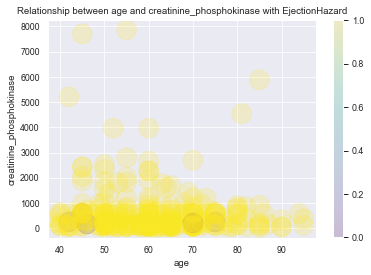

In [158]:
plt.scatter(df.age, df.creatinine_phosphokinase, c=df.EjectionHazard, s=389,
            alpha=0.2, cmap="viridis")
plt.colorbar();
plt.xlabel("age")
plt.ylabel("creatinine_phosphokinase") 
plt.title("Relationship between age and creatinine_phosphokinase with EjectionHazard")
plt.show()

## Subplots ile Scatter plot Veri Görselleştirmesi

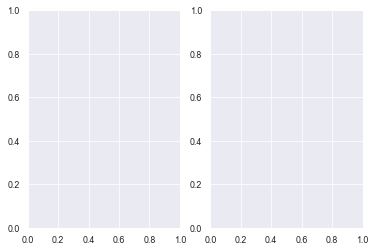

In [159]:
fig, ax = plt.subplots(1,2)
plt.show()

Önceliği belirlenmiş "age" ve "creatinine_phosphokinase" parametrelerine göre grafik oluşturulur

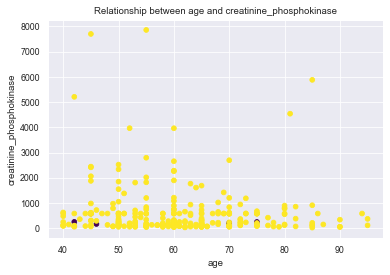

In [160]:
fig, ax = plt.subplots()
ax.scatter(df.age, df.creatinine_phosphokinase, c=df.EjectionHazard, cmap="viridis")
ax.set_xlabel("age")
ax.set_ylabel("creatinine_phosphokinase")
ax.set_title("Relationship between age and creatinine_phosphokinase")
plt.show()

Önceliği belirlenmiş "serum_creatinine" ve "serum_sodium" parametrelerine göre grafik oluşturulur

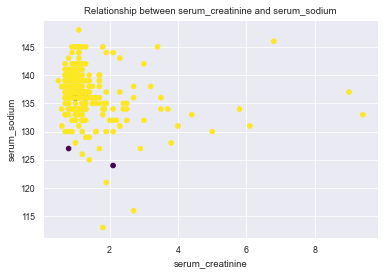

In [161]:
fig, ax = plt.subplots()
ax.scatter(df.serum_creatinine, df.serum_sodium, c=df.EjectionHazard, cmap="viridis")
ax.set_xlabel("serum_creatinine")
ax.set_ylabel("serum_sodium")
ax.set_title("Relationship between serum_creatinine and serum_sodium")
plt.show()

### Matplotlib ile Categorical Plots Veri Görselleştirmesi

Categoric verilerin özelliklerine bakmamıza olanak sağlar

#### Histogram

Numerik ya da kategorik verilerde dağılımı yorumlamamıza yardım eder

"age" özelliği için kaç aralığa bölüneceği belirlenen ve axis isimleri girilen grafik:

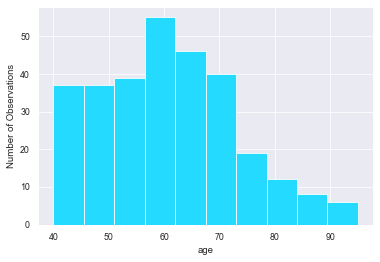

In [162]:
fig, ax = plt.subplots()
ax.hist(df.age, label="age", bins=10)
ax.set_xlabel("age")
ax.set_ylabel("Number of Observations")
plt.show()

"serum_sodium" özelliği için kaç aralığa bölüneceği belirlenen ve axis isimleri girilen grafik:

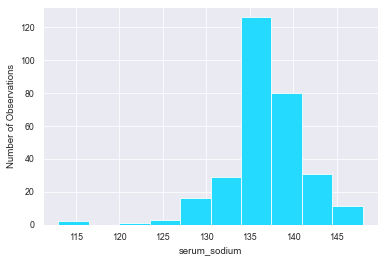

In [163]:
fig, ax = plt.subplots()
ax.hist(df.serum_sodium, label="serum_sodium", bins=10) #bins: kaç aralığa bölünecek
ax.set_xlabel("serum_sodium") #axis isimleri
ax.set_ylabel("Number of Observations")
plt.show()

"age" özelliği için bins değeri el ile girilmiş ve axis isimleri girilen grafik:

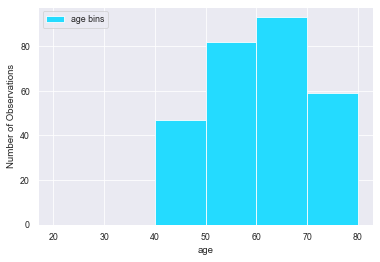

In [164]:
bins=[20,30,40,50,60,70,80]
fig, ax = plt.subplots()
ax.hist(df.age, label="age bins", bins=bins) 
ax.set_xlabel("age")
ax.set_ylabel("Number of Observations")
plt.legend()
plt.show()

"age" özelliği için bins değeri el ile girilmiş ve axis isimleri girilen grafik:

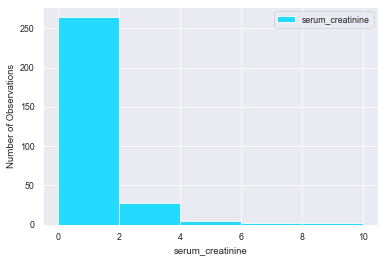

In [165]:
bins=[0,2,4,6,8,10]
fig, ax = plt.subplots()
ax.hist(df.serum_creatinine, label="serum_creatinine", bins=bins) 
ax.set_xlabel("serum_creatinine")
ax.set_ylabel("Number of Observations")
plt.legend()
plt.show()

Önceliği belirlenmiş "DEATH_EVENT" ve "creatinine_phosphokinase" parametrelerine göre grafik oluşturulur

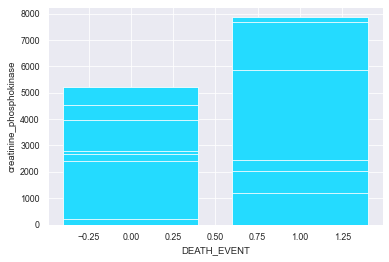

In [166]:
fig, ax = plt.subplots()
ax.bar(df.DEATH_EVENT, df.creatinine_phosphokinase)
ax.set_xlabel("DEATH_EVENT")
ax.set_ylabel("creatinine_phosphokinase")
plt.show()

Önceliği belirlenmiş "smoking" ve "serum_creatinine" parametrelerine göre grafik oluşturulur

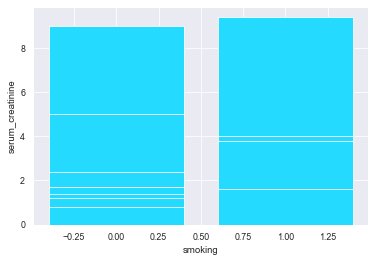

In [167]:
fig, ax = plt.subplots()
ax.bar(df.smoking, df.serum_creatinine)
ax.set_xlabel("smoking")
ax.set_ylabel("serum_creatinine")
plt.show()

Yaşlara göre creatinine_phosphokinase değerlerine bakılır ve png formatında kaydedilir:

C:\Users\jetti\AppData\Local\Temp/ipykernel_3100/2368774064.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.age, rotation=90)


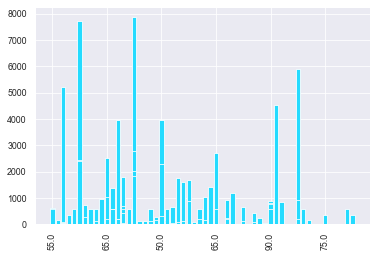

In [168]:
fig, ax = plt.subplots()
ax.bar(df.age, df.creatinine_phosphokinase)
ax.set_xticklabels(df.age, rotation=90)
fig.savefig("age.png", dpi=500)

Zamana göre serum_creatinine değerlerine bakılır ve png formatında kaydedilir:

C:\Users\jetti\AppData\Local\Temp/ipykernel_3100/1564898294.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.time, rotation=90)


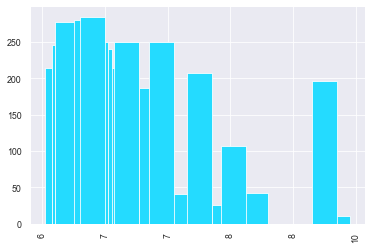

In [169]:
fig, ax = plt.subplots()
ax.bar(df.serum_creatinine, df.time)
ax.set_xticklabels(df.time, rotation=90)
fig.savefig("serum_creatinine.png", dpi=500)

## Count Plot Veri Görselleştirmesi

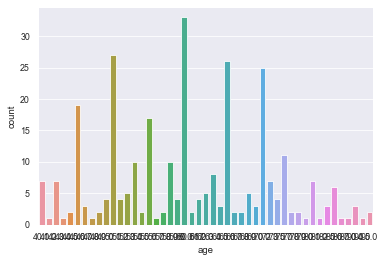

In [170]:
sns.set_palette("RdBu")
sns.countplot(x="age", data=df)
plt.show()

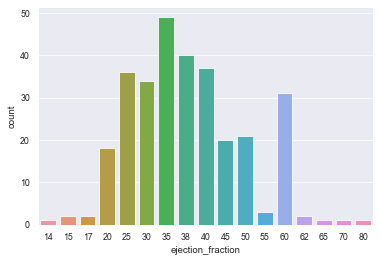

In [171]:
sns.set_palette("RdBu")
sns.countplot(x="ejection_fraction", data=df)
plt.show()

Önceliği belirlenmiş "age" parametresi, aspect değeri ayarlanarak grafik oluşturulur

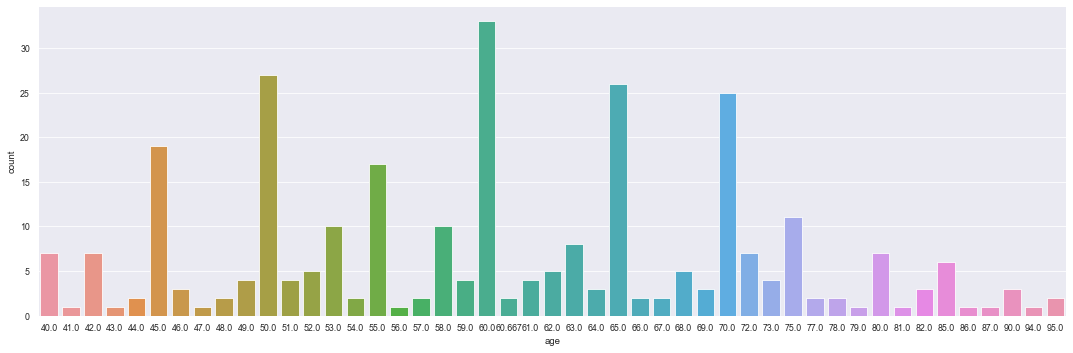

In [172]:
sns.catplot(x="age", aspect=3, data=df, kind="count")
plt.show()

Önceliği belirlenmiş "ejection_fraction" parametresi, aspect değeri ayarlanarak grafik oluşturulur

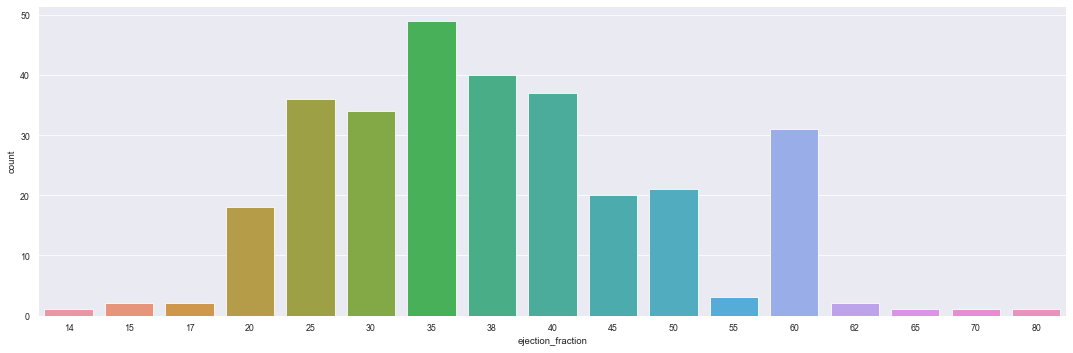

In [173]:
sns.catplot(x="ejection_fraction", aspect=3, data=df, kind="count")
plt.show()

Önceliği belirlenmiş "age" parametresi, aspect değeri ayarlanarak grafik oluşturulur

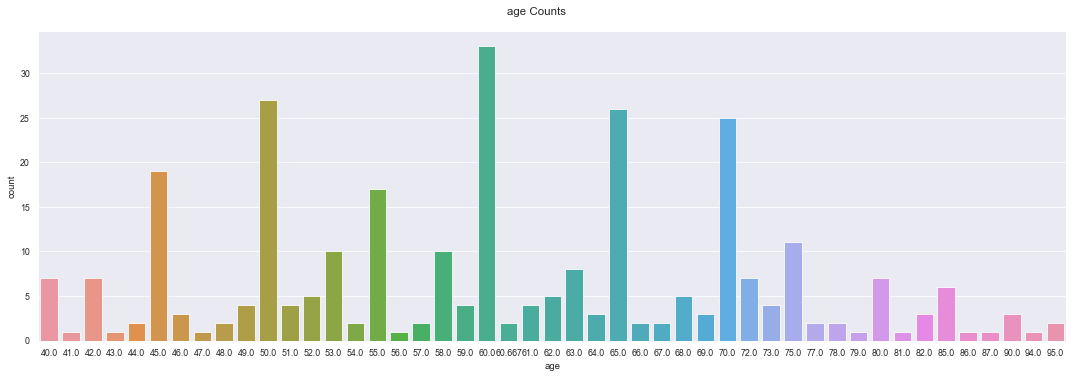

In [174]:
g = sns.catplot(x="age", aspect=3, data=df, kind="count")
g.fig.suptitle("age Counts", y=1.04)
plt.show()

Önceliği belirlenmiş "ejection_fraction" parametresi, aspect değeri ayarlanarak grafik oluşturulur

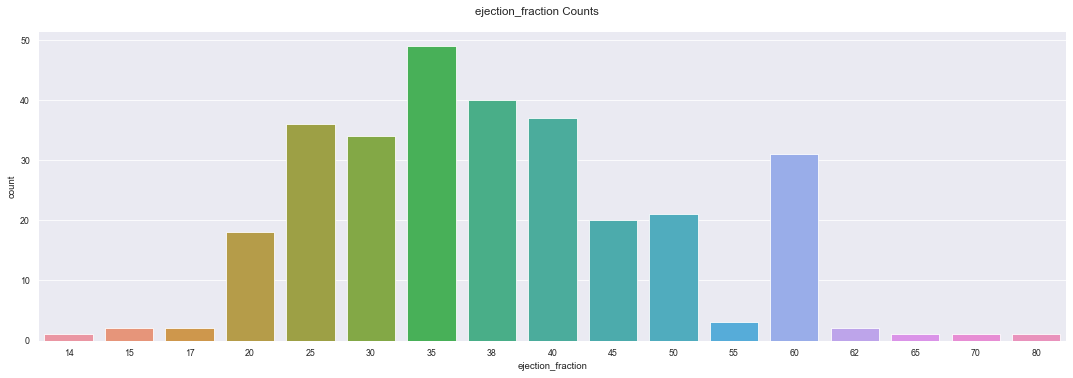

In [175]:
g = sns.catplot(x="ejection_fraction", aspect=3, data=df, kind="count")
g.fig.suptitle("ejection_fraction Counts", y=1.04)
plt.show()

Önceliği belirlenmiş "age" parametresi, aspect değeri ayarlanarak grafik oluşturulur

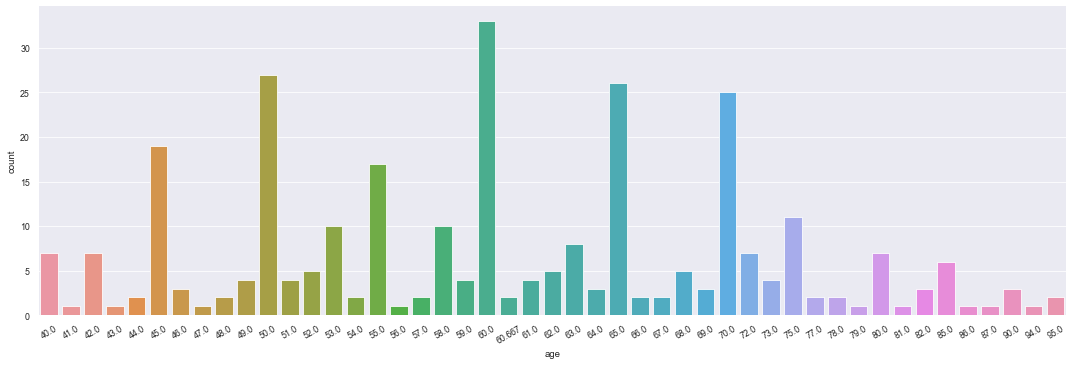

In [176]:
g = sns.catplot(x="age", aspect=3, data=df, kind="count")
plt.xticks(rotation=30)
plt.show()

Önceliği belirlenmiş "ejection_fraction" parametresi, aspect değeri ayarlanarak grafik oluşturulur

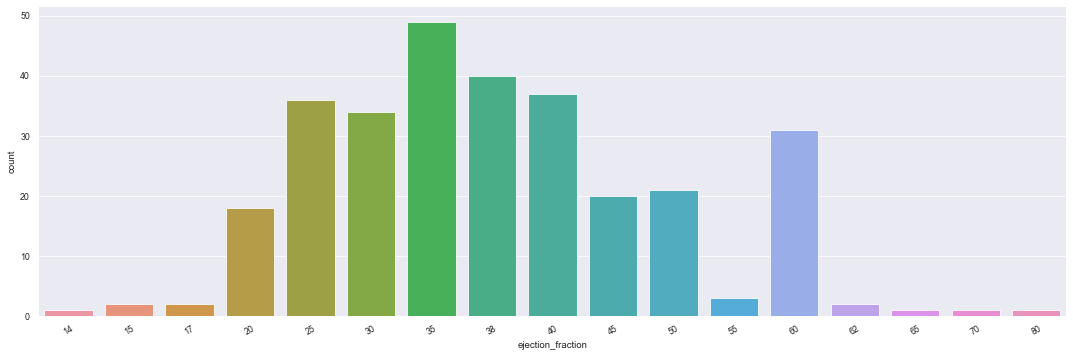

In [177]:
g = sns.catplot(x="ejection_fraction", aspect=3, data=df, kind="count")
plt.xticks(rotation=30)
plt.show()

## Scatter Plot Veri Görselleştirmesi

Önceliği belirlenmiş "age" ve "creatinine_phosphokinase" parametrelerine göre grafik oluşturulur

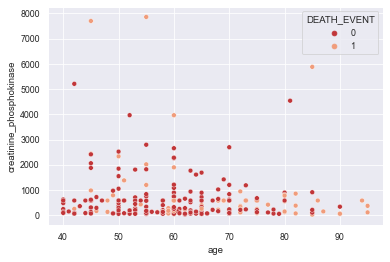

In [178]:
sns.scatterplot(x="age", y="creatinine_phosphokinase", data=df, hue="DEATH_EVENT")
plt.show()

Önceliği belirlenmiş "age" ve "serum_creatinine" parametrelerine göre grafik oluşturulur

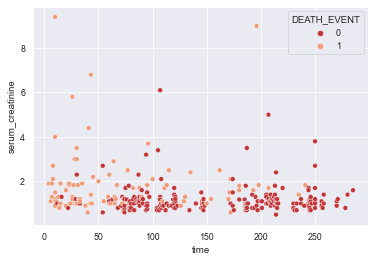

In [179]:
sns.scatterplot(x="time", y="serum_creatinine", data=df, hue="DEATH_EVENT")
plt.show()

Önceliği belirlenmiş "age" ve "creatinine_phosphokinase" parametrelerine göre grafik oluşturulur

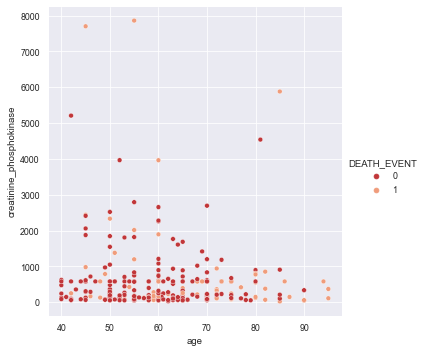

In [180]:
sns.relplot(x="age", y="creatinine_phosphokinase", data=df, hue="DEATH_EVENT",
           kind="scatter")
plt.show()

Önceliği belirlenmiş "time" ve "serum_creatinine" parametrelerine göre grafik oluşturulur

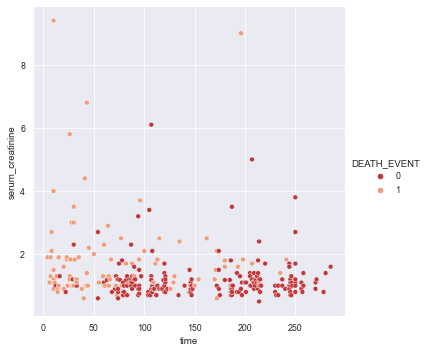

In [181]:
sns.relplot(x="time", y="serum_creatinine", data=df, hue="DEATH_EVENT",
           kind="scatter")
plt.show()

## Line Plot Veri Görselleştirmesi

In [182]:
df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  EjectionHazard  
0        0     4            1               1  
1        0     6            1               1  
2        1     7            1               1  
3        0     7            1               1  
4        0     8            1               1

Önceliği belirlenmiş "age" ve "creatinine_phosphokinase" parametrelerine göre grafik oluşturulur

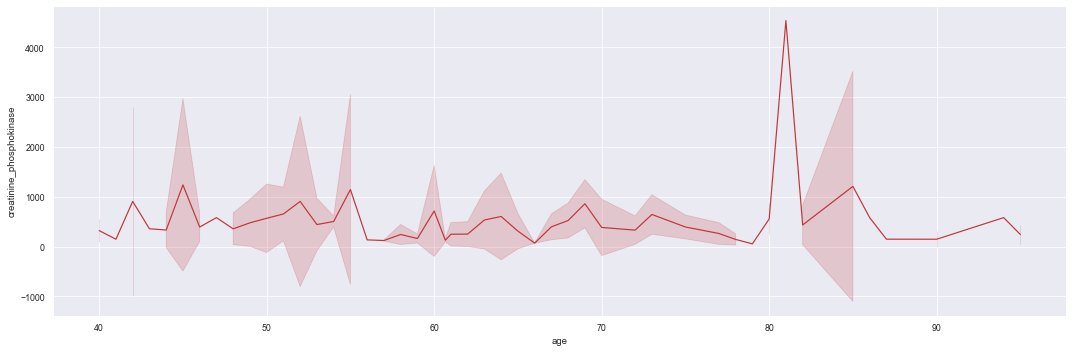

In [183]:
sns.relplot(x="age", y="creatinine_phosphokinase", data=df, kind="line", ci="sd", aspect = 3, markers=True, dashes=False)
plt.show()

Önceliği belirlenmiş "time" ve "serum_creatinine" parametrelerine göre grafik oluşturulur

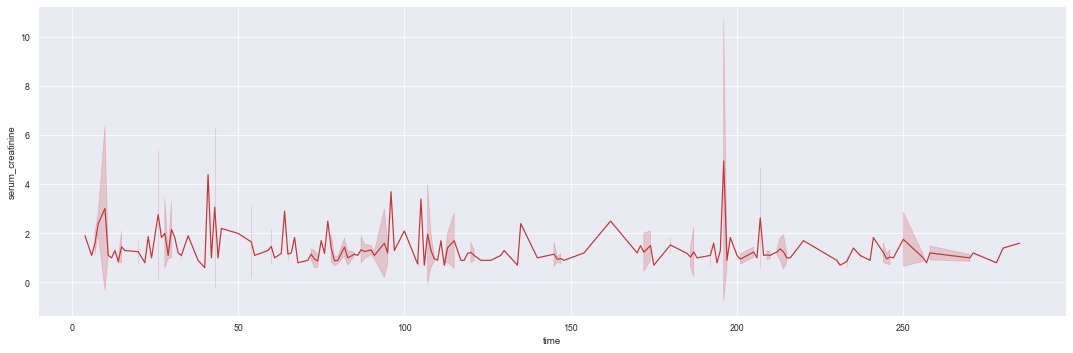

In [184]:
sns.relplot(x="time", y="serum_creatinine", data=df, kind="line", ci="sd", aspect = 3, markers=True, dashes=False)
plt.show()

Önceliği belirlenmiş "age" ve "creatinine_phosphokinase" parametrelerine göre grafik oluşturulur

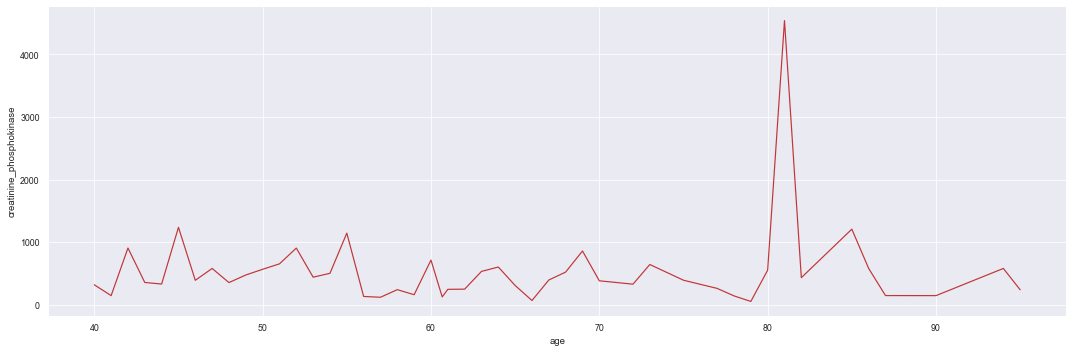

In [185]:
sns.relplot(x="age", y="creatinine_phosphokinase", data=df, kind="line", ci=None, aspect = 3, markers=True, dashes=False)
plt.show()

Önceliği belirlenmiş "time" ve "serum_creatinine" parametrelerine göre grafik oluşturulur

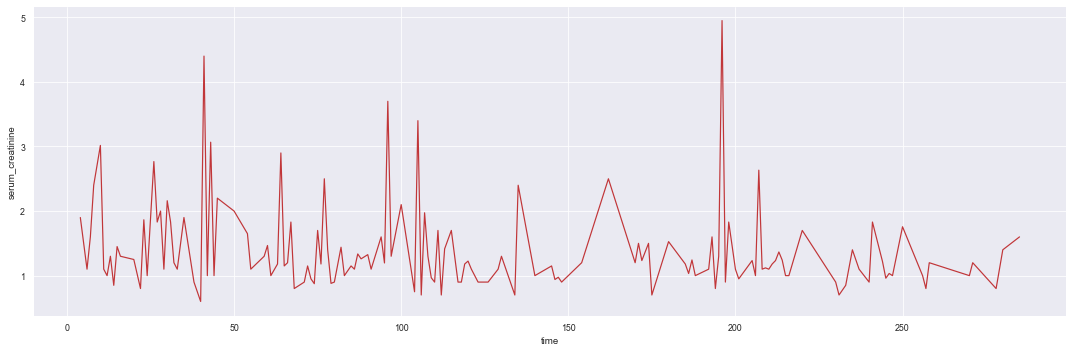

In [186]:
sns.relplot(x="time", y="serum_creatinine", data=df, kind="line", ci=None, aspect = 3, markers=True, dashes=False)
plt.show()

## Scatter Subplots Veri Görselleştirmeleri

"serum_sodium" özelliğine göre karşılaştırma yapılır:

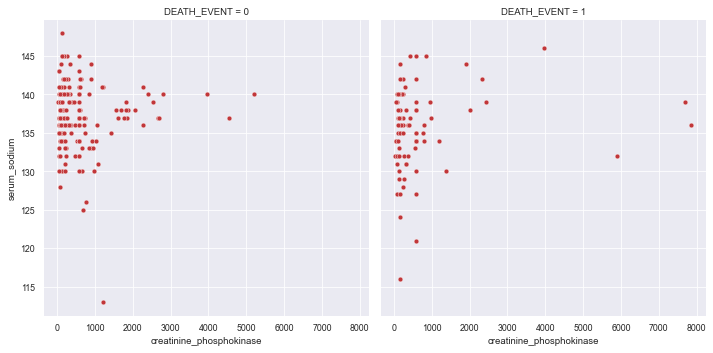

In [187]:
sns.relplot(x="creatinine_phosphokinase", y="serum_sodium", data=df, kind="scatter", col="DEATH_EVENT")
plt.show()

"serum_creatinine" özelliğine göre karşılaştırma yapılır:

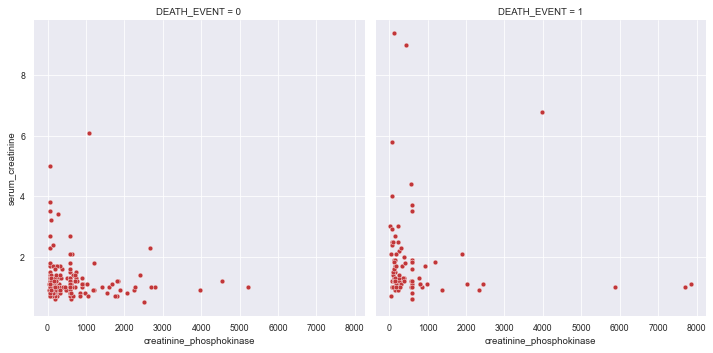

In [188]:
sns.relplot(x="creatinine_phosphokinase", y="serum_creatinine", data=df, kind="scatter", col="DEATH_EVENT")
plt.show()

"creatinine_phosphokinase" özelliğine göre karşılaştırma yapılır:

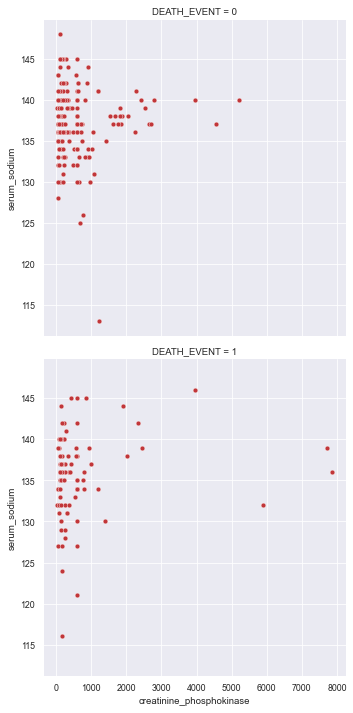

In [189]:
sns.relplot(x="creatinine_phosphokinase", y="serum_sodium", data=df, kind="scatter", row="DEATH_EVENT")
plt.show()

"ejection_fraction" özelliğine göre karşılaştırma yapılır:

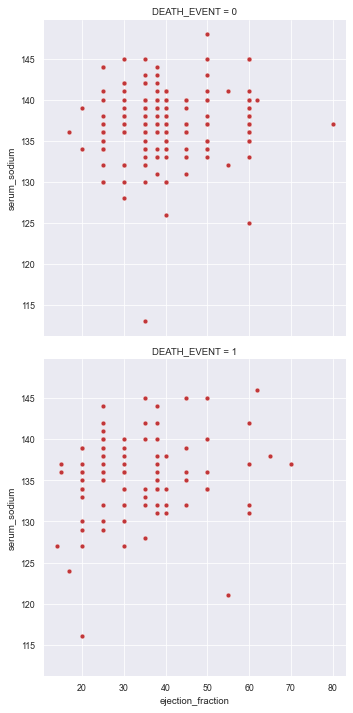

In [190]:
sns.relplot(x="ejection_fraction", y="serum_sodium", data=df, kind="scatter", row="DEATH_EVENT")
plt.show()

"EjectionHazard" ve diğer parametrelere göre karşılaştırmalar yapılır:

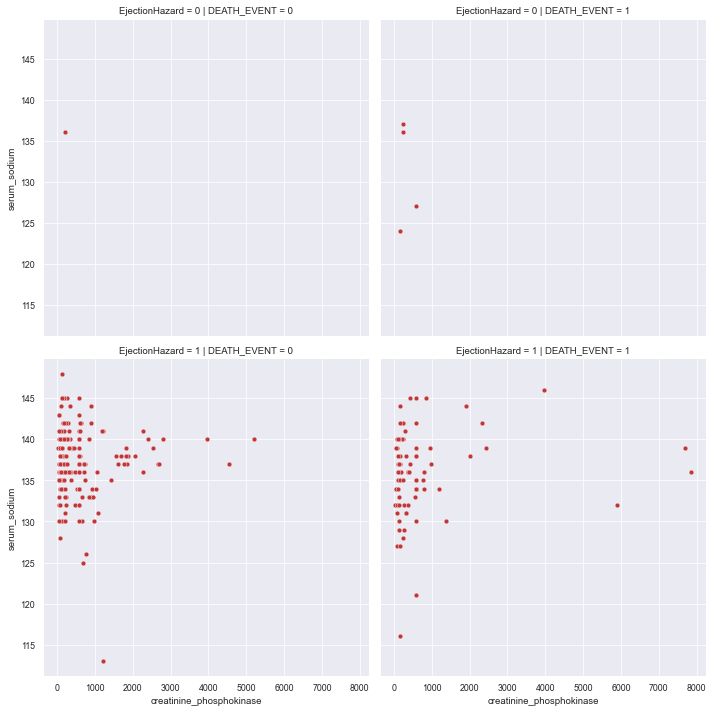

In [191]:
sns.relplot(x="creatinine_phosphokinase", y="serum_sodium", data=df, kind="scatter",col="DEATH_EVENT", row="EjectionHazard") 
plt.show()

"EjectionHazard" ve diğer parametrelere göre karşılaştırmalar yapılır:

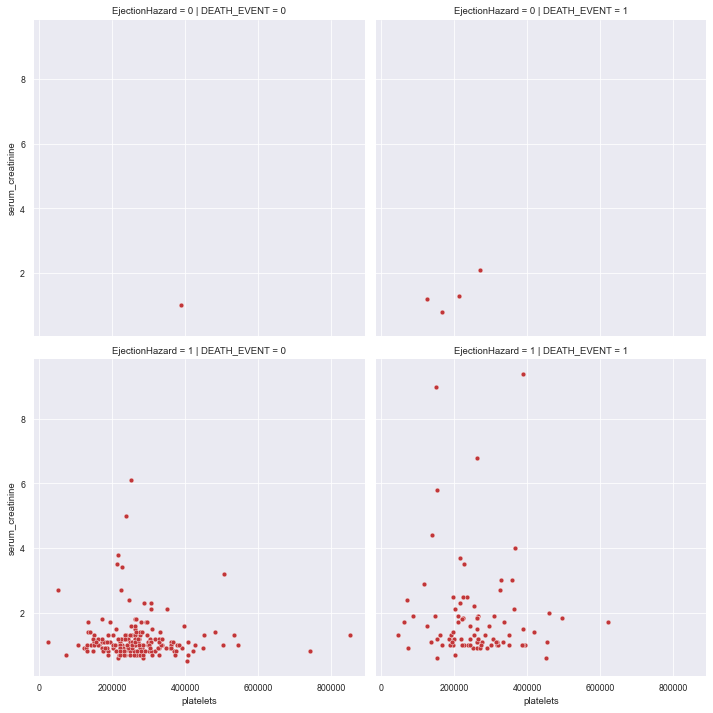

In [192]:
sns.relplot(x="platelets", y="serum_creatinine", data=df, kind="scatter",col="DEATH_EVENT", row="EjectionHazard") 
plt.show()

## Heatmap Veri Görselleştirmesi

Korelasyonu görmemizi sağlar. Korelasyon ne kadar iyiyse makine öğrenmesi modeli de o kadar iyi çalışır.

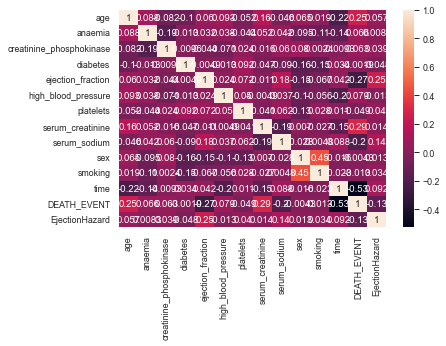

In [193]:
sns.set_palette("RdBu")
correlation=df.corr()
sns.heatmap(correlation, annot=True)
plt.show()

## Categorical Plots Veri Görselleştirmesi

Bar plot, bizlere kategorik veri hakkında bilgi verir:

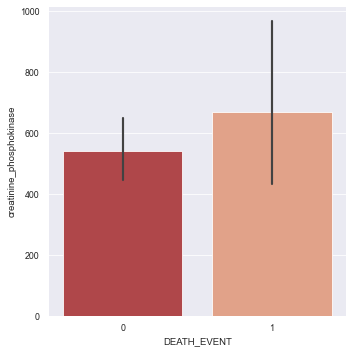

In [194]:
sns.catplot(x="DEATH_EVENT",y="creatinine_phosphokinase",data=df, kind="bar")
plt.show()

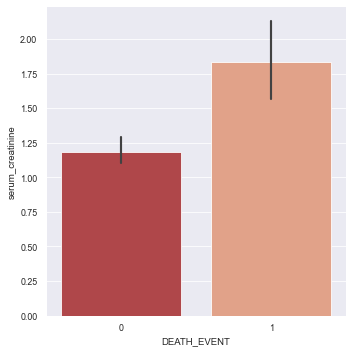

In [195]:
sns.catplot(x="DEATH_EVENT",y="serum_creatinine",data=df, kind="bar")
plt.show()

## Box Plot Veri Görselleştirmesi

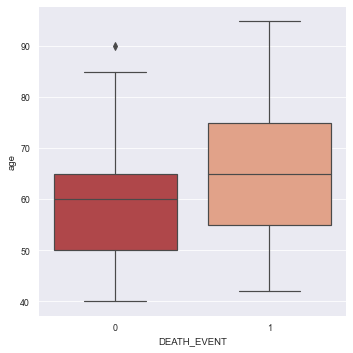

In [196]:
sns.catplot(x="DEATH_EVENT",y="age", data=df, kind="box")
plt.show()

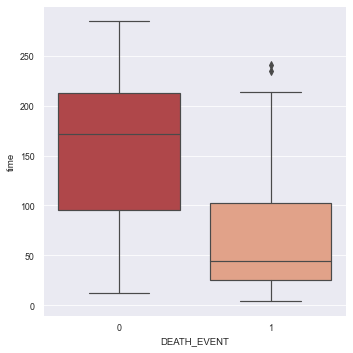

In [197]:
sns.catplot(x="DEATH_EVENT",y="time", data=df, kind="box")
plt.show()

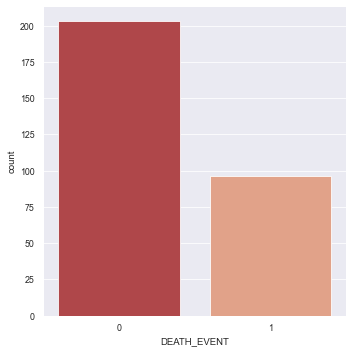

In [198]:
sns.set_style("darkgrid")
sns.catplot(x="DEATH_EVENT", data=df, kind="count")
plt.show()

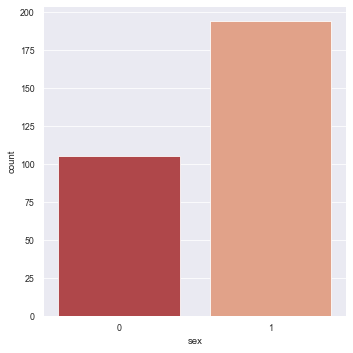

In [199]:
sns.set_style("darkgrid")
sns.catplot(x="sex", data=df, kind="count")
plt.show()

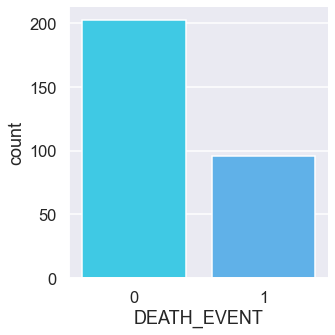

In [200]:
sns.set_context("talk")
sns.set_palette("cool")
sns.catplot(x="DEATH_EVENT", data=df, kind="count")
plt.show()

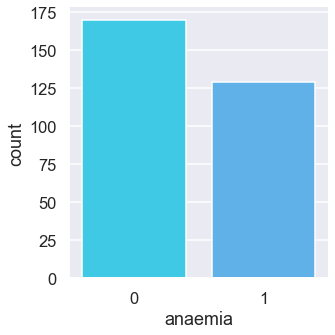

In [201]:
sns.set_context("talk")
sns.set_palette("cool")
sns.catplot(x="anaemia", data=df, kind="count")
plt.show()

## Violin Grafiği Veri Görselleştirmesi

In [202]:
df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  EjectionHazard  
0        0     4            1               1  
1        0     6            1               1  
2        1     7            1               1  
3        0     7            1               1  
4        0     8            1               1

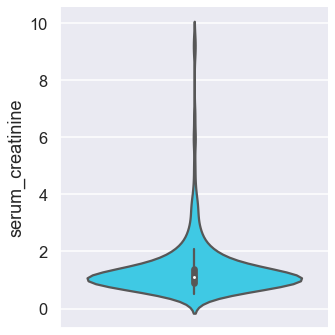

In [203]:
sns.catplot(y = "serum_creatinine", kind = "violin", data=df);

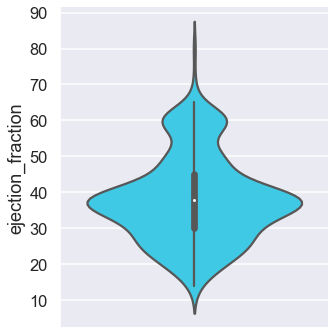

In [204]:
sns.catplot(y = "ejection_fraction", kind = "violin", data=df);

#### Violin Grafik Çaprazlamalar Veri Görselleştirmesi

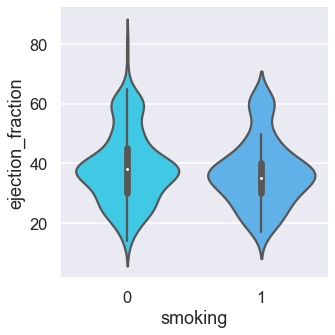

In [205]:
sns.catplot(x="smoking", y="ejection_fraction", kind="violin", data=df);

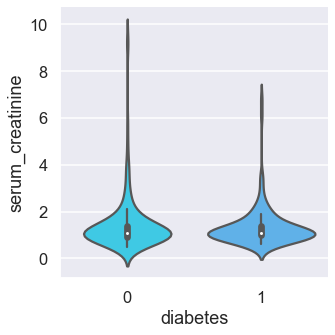

In [206]:
sns.catplot(x="diabetes", y="serum_creatinine", kind="violin", data=df);

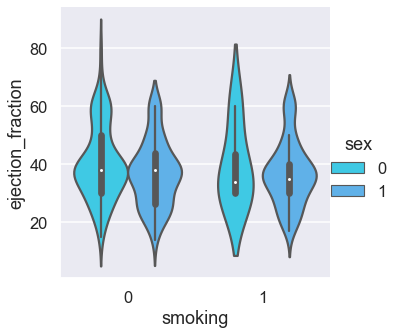

In [207]:
sns.catplot(x="smoking", y="ejection_fraction", hue="sex", kind="violin", data=df);

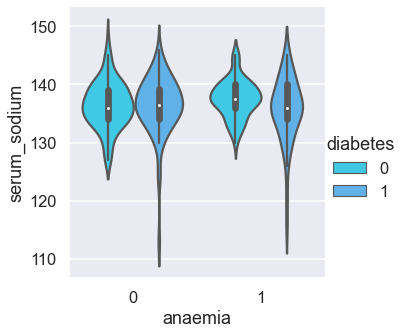

In [208]:
sns.catplot(x="anaemia", y="serum_sodium", hue="diabetes", kind="violin", data=df);

## Doğrusal İlişkinin Gösterilmesi

## lmplot Veri Görselleştirmeleri

In [209]:
df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  EjectionHazard  
0        0     4            1               1  
1        0     6            1               1  
2        1     7            1               1  
3        0     7            1               1  
4        0     8            1               1

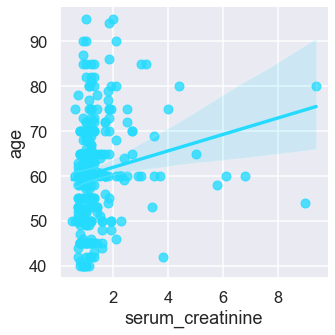

In [210]:
sns.lmplot(x = "serum_creatinine", y = "age", data=df);

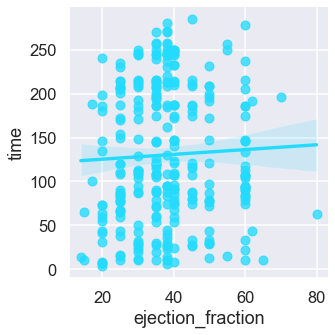

In [211]:
sns.lmplot(x = "ejection_fraction", y = "time", data=df);

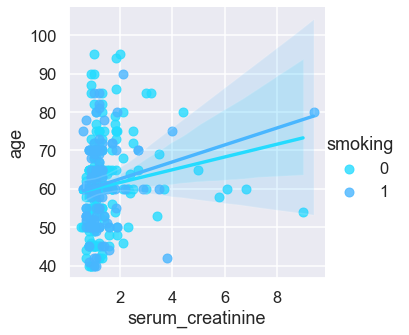

In [212]:
sns.lmplot(x="serum_creatinine", y="age", hue="smoking", data=df);

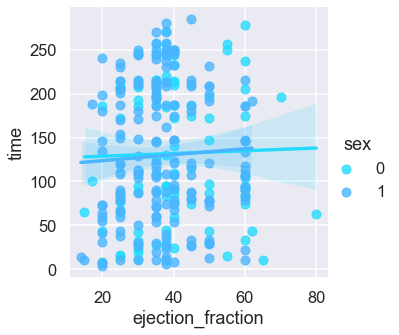

In [213]:
sns.lmplot(x="ejection_fraction", y="time", hue="sex", data=df);

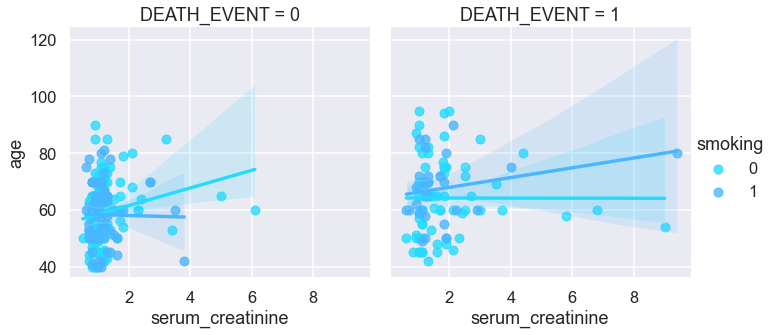

In [214]:
sns.lmplot(x="serum_creatinine", y="age", hue="smoking", col="DEATH_EVENT", data=df);

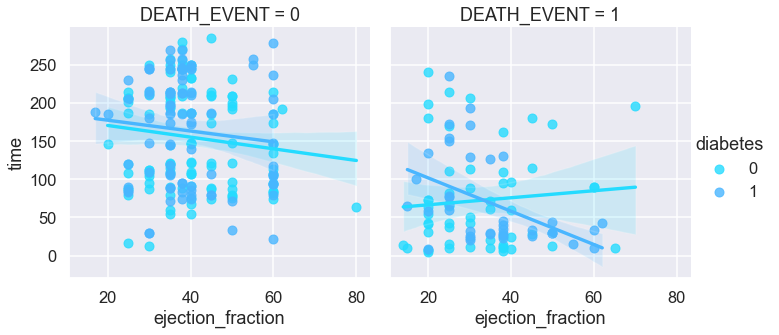

In [215]:
sns.lmplot(x="ejection_fraction", y="time", hue="diabetes", col="DEATH_EVENT", data=df);

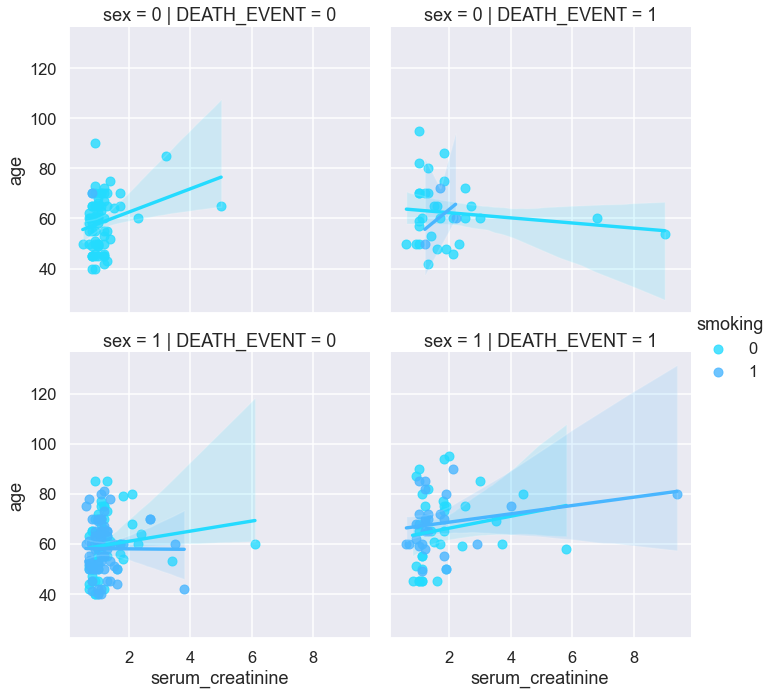

In [216]:
sns.lmplot(x="serum_creatinine", y="age", hue="smoking", col="DEATH_EVENT", row="sex", data=df);

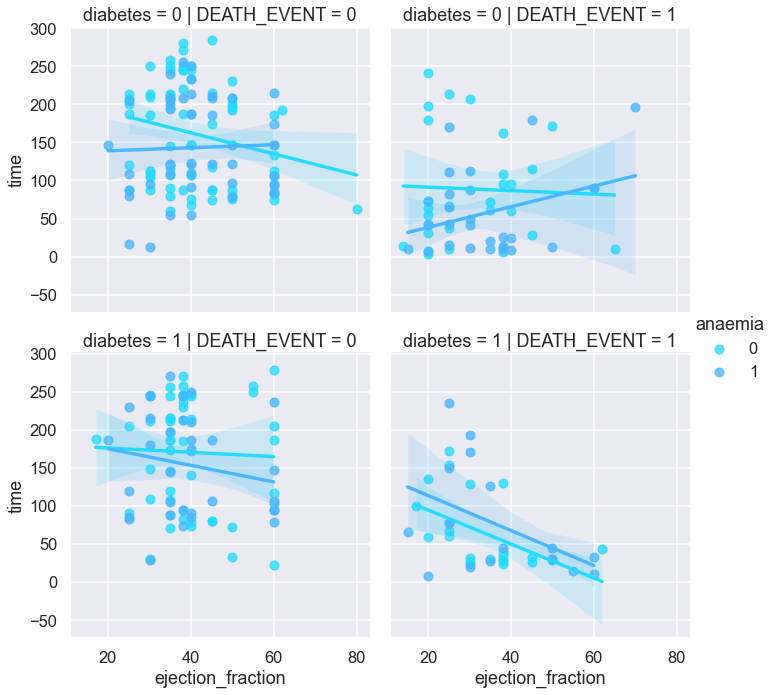

In [217]:
sns.lmplot(x="ejection_fraction", y="time", hue="anaemia", col="DEATH_EVENT", row="diabetes", data=df);

## Scatterplot Matrisi (PairPlot) ile Veri Görselleştirme

In [218]:
df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  EjectionHazard  
0        0     4            1               1  
1        0     6            1               1  
2        1     7            1               1  
3        0     7            1               1  
4        0     8            1               1

In [219]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
EjectionHazard                int64
dtype: object

In [220]:
df.shape

(299, 14)

In [221]:
df.describe().T

count           mean           std      min  \
age                       299.0      60.833893     11.894809     40.0   
anaemia                   299.0       0.431438      0.496107      0.0   
creatinine_phosphokinase  299.0     581.839465    970.287881     23.0   
diabetes                  299.0       0.418060      0.494067      0.0   
ejection_fraction         299.0      38.083612     11.834841     14.0   
high_blood_pressure       299.0       0.351171      0.478136      0.0   
platelets                 299.0  263358.029264  97804.236869  25100.0   
serum_creatinine          299.0       1.393880      1.034510      0.5   
serum_sodium              299.0     136.625418      4.412477    113.0   
sex                       299.0       0.648829      0.478136      0.0   
smoking                   299.0       0.321070      0.467670      0.0   
time                      299.0     130.260870     77.614208      4.0   
DEATH_EVENT               299.0       0.321070      0.467670      0.0   
EjectionHazard            299.0       0.983278      0.128444      0.0   

                               25%       50%       75%       max  
age                           51.0      60.0      70.0      95.0  
anaemia                        0.0       0.0       1.0       1.0  
creatinine_phosphokinase     116.5     250.0     582.0    7861.0  
diabetes                       0.0       0.0       1.0       1.0  
ejection_fraction             30.0      38.0      45.0      80.0  
high_blood_pressure            0.0       0.0       1.0       1.0  
platelets                 212500.0  262000.0  303500.0  850000.0  
serum_creatinine               0.9       1.1       1.4       9.4  
serum_sodium                 134.0     137.0     140.0     148.0  
sex                            0.0       1.0       1.0       1.0  
smoking                        0.0       0.0       1.0       1.0  
time                          73.0     115.0     203.0     285.0  
DEATH_EVENT                    0.0       0.0       1.0       1.0  
EjectionHazard                 1.0       1.0       1.0       1.0

In [222]:
df.groupby(["high_blood_pressure"]).mean().T

high_blood_pressure                   0              1
age                           60.018902      62.339686
anaemia                        0.417526       0.457143
creatinine_phosphokinase     632.144330     488.895238
diabetes                       0.422680       0.409524
ejection_fraction             37.871134      38.476190
platelets                 259769.002629  269989.183238
serum_creatinine               1.397629       1.386952
serum_sodium                 136.505155     136.847619
sex                            0.685567       0.580952
smoking                        0.340206       0.285714
time                         141.458763     109.571429
DEATH_EVENT                    0.293814       0.371429
EjectionHazard                 0.984536       0.980952

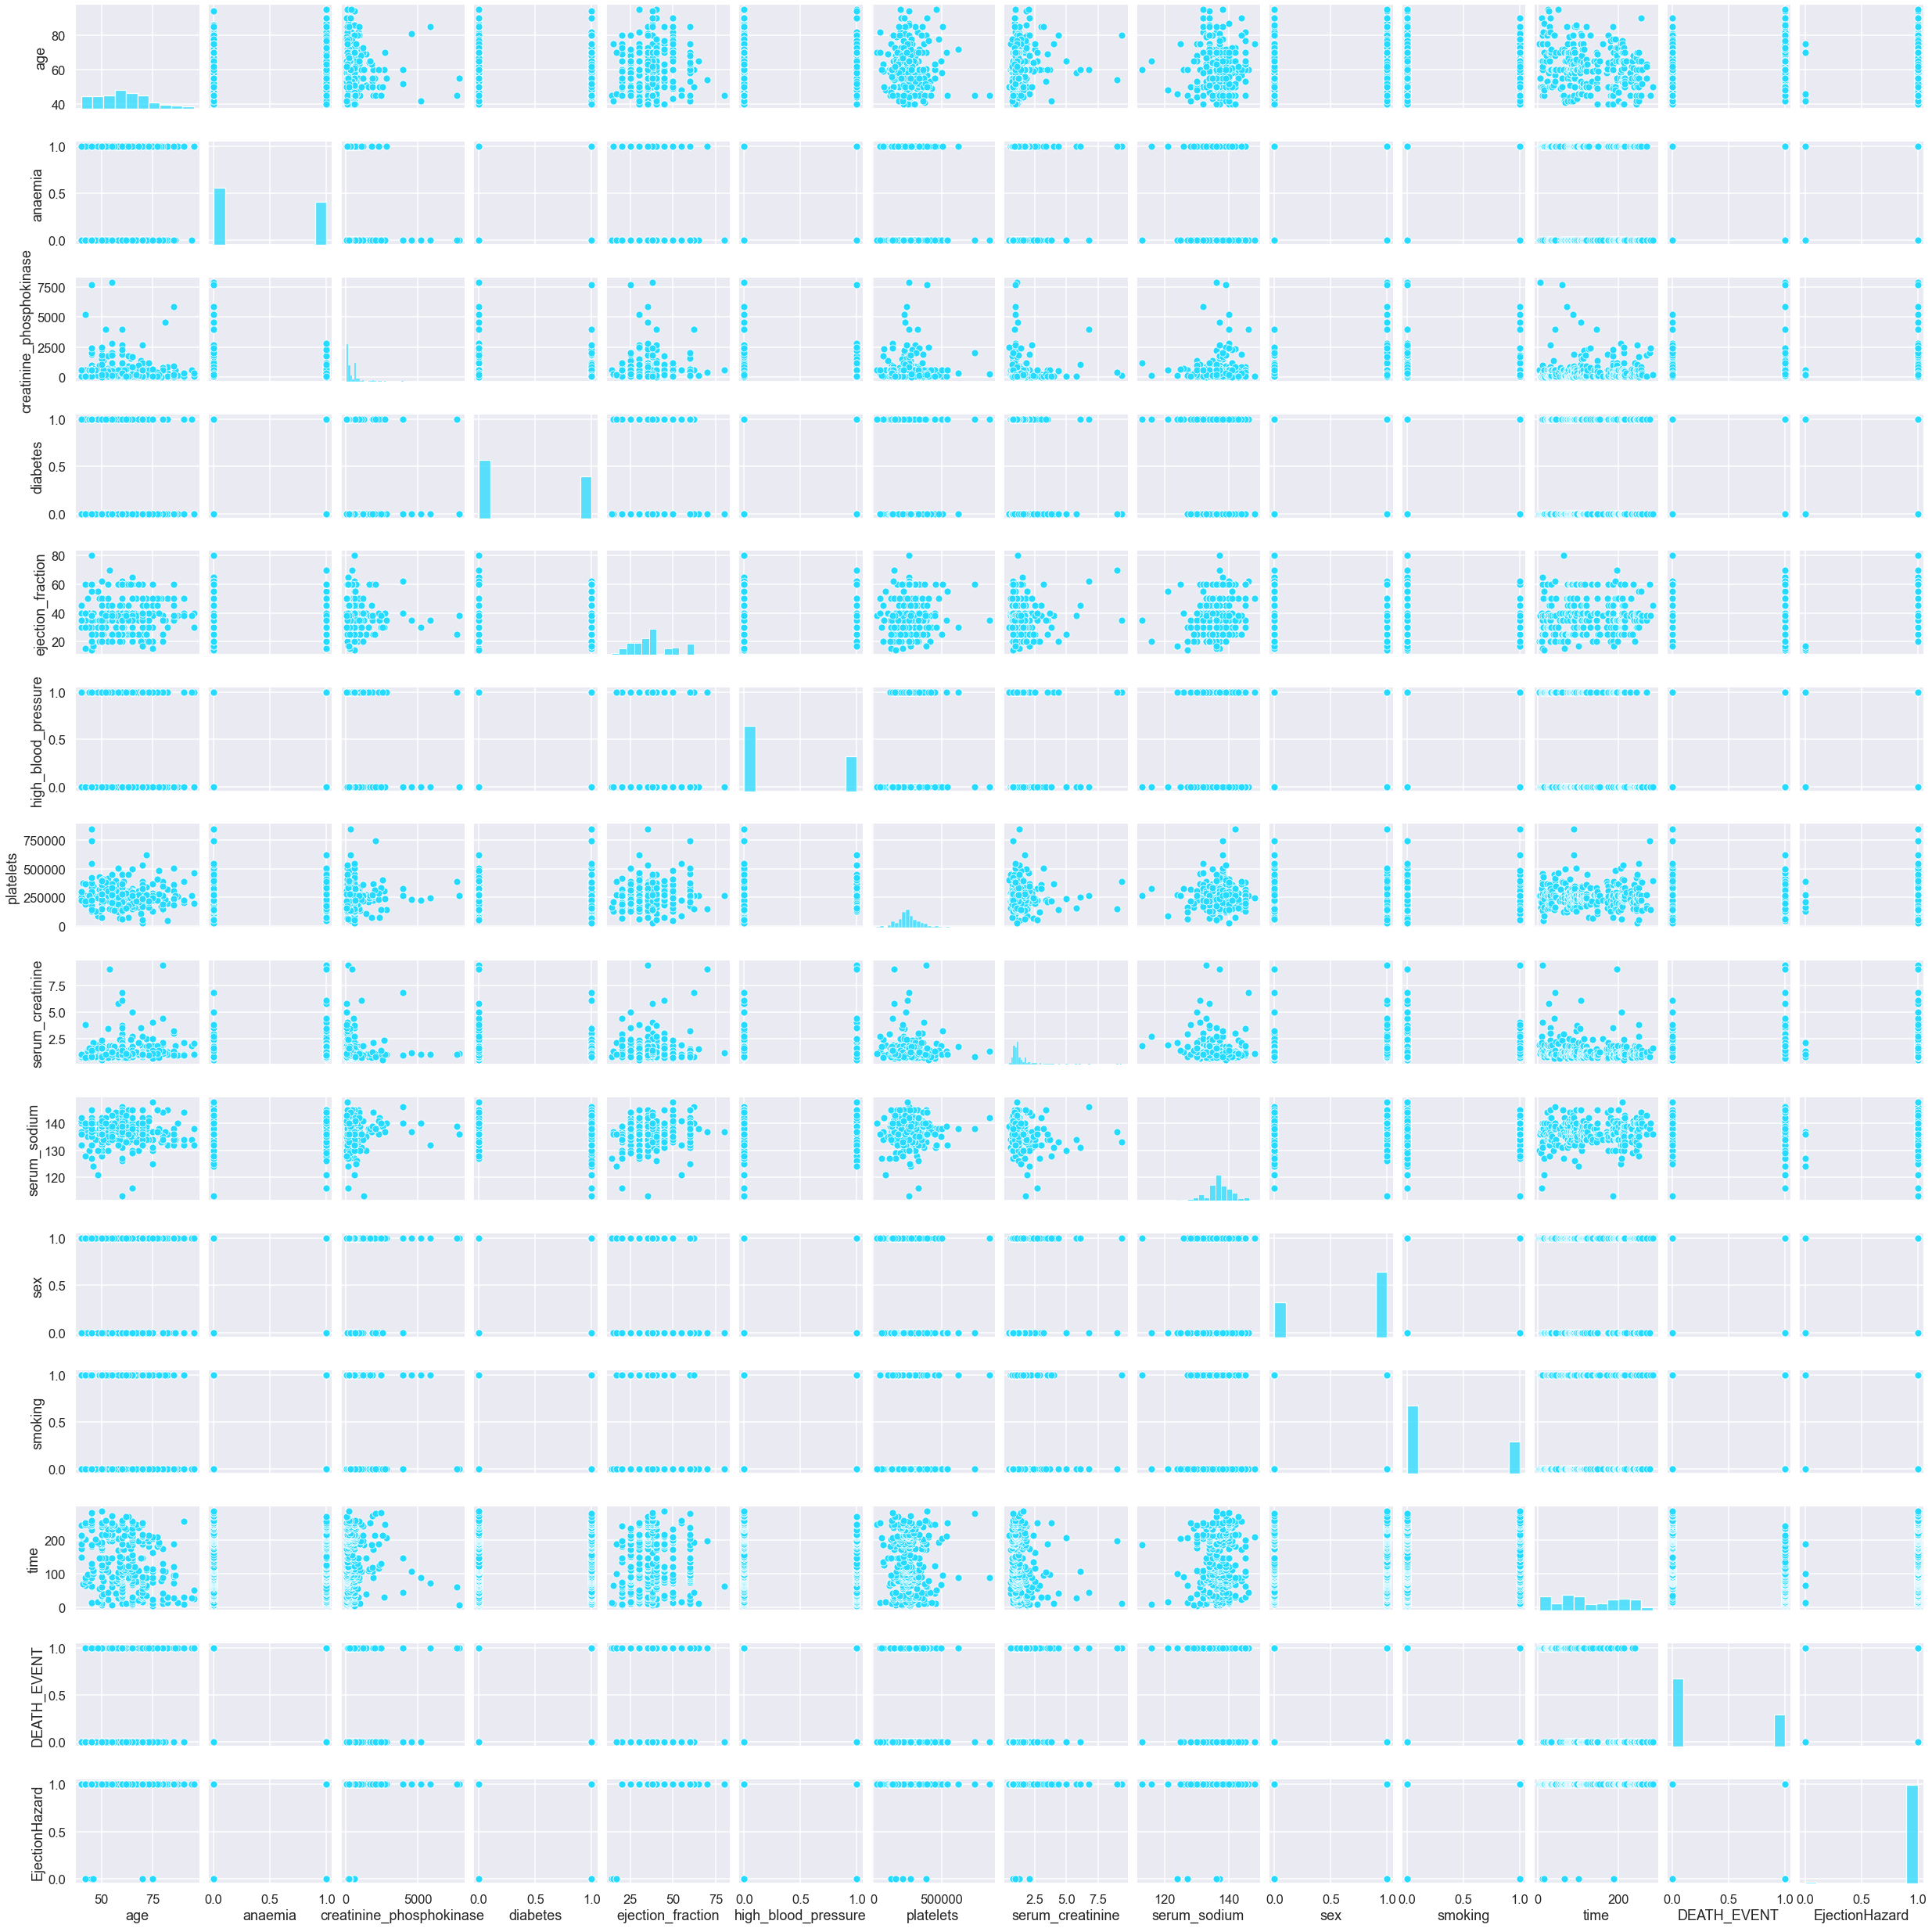

In [223]:
sns.pairplot(df)

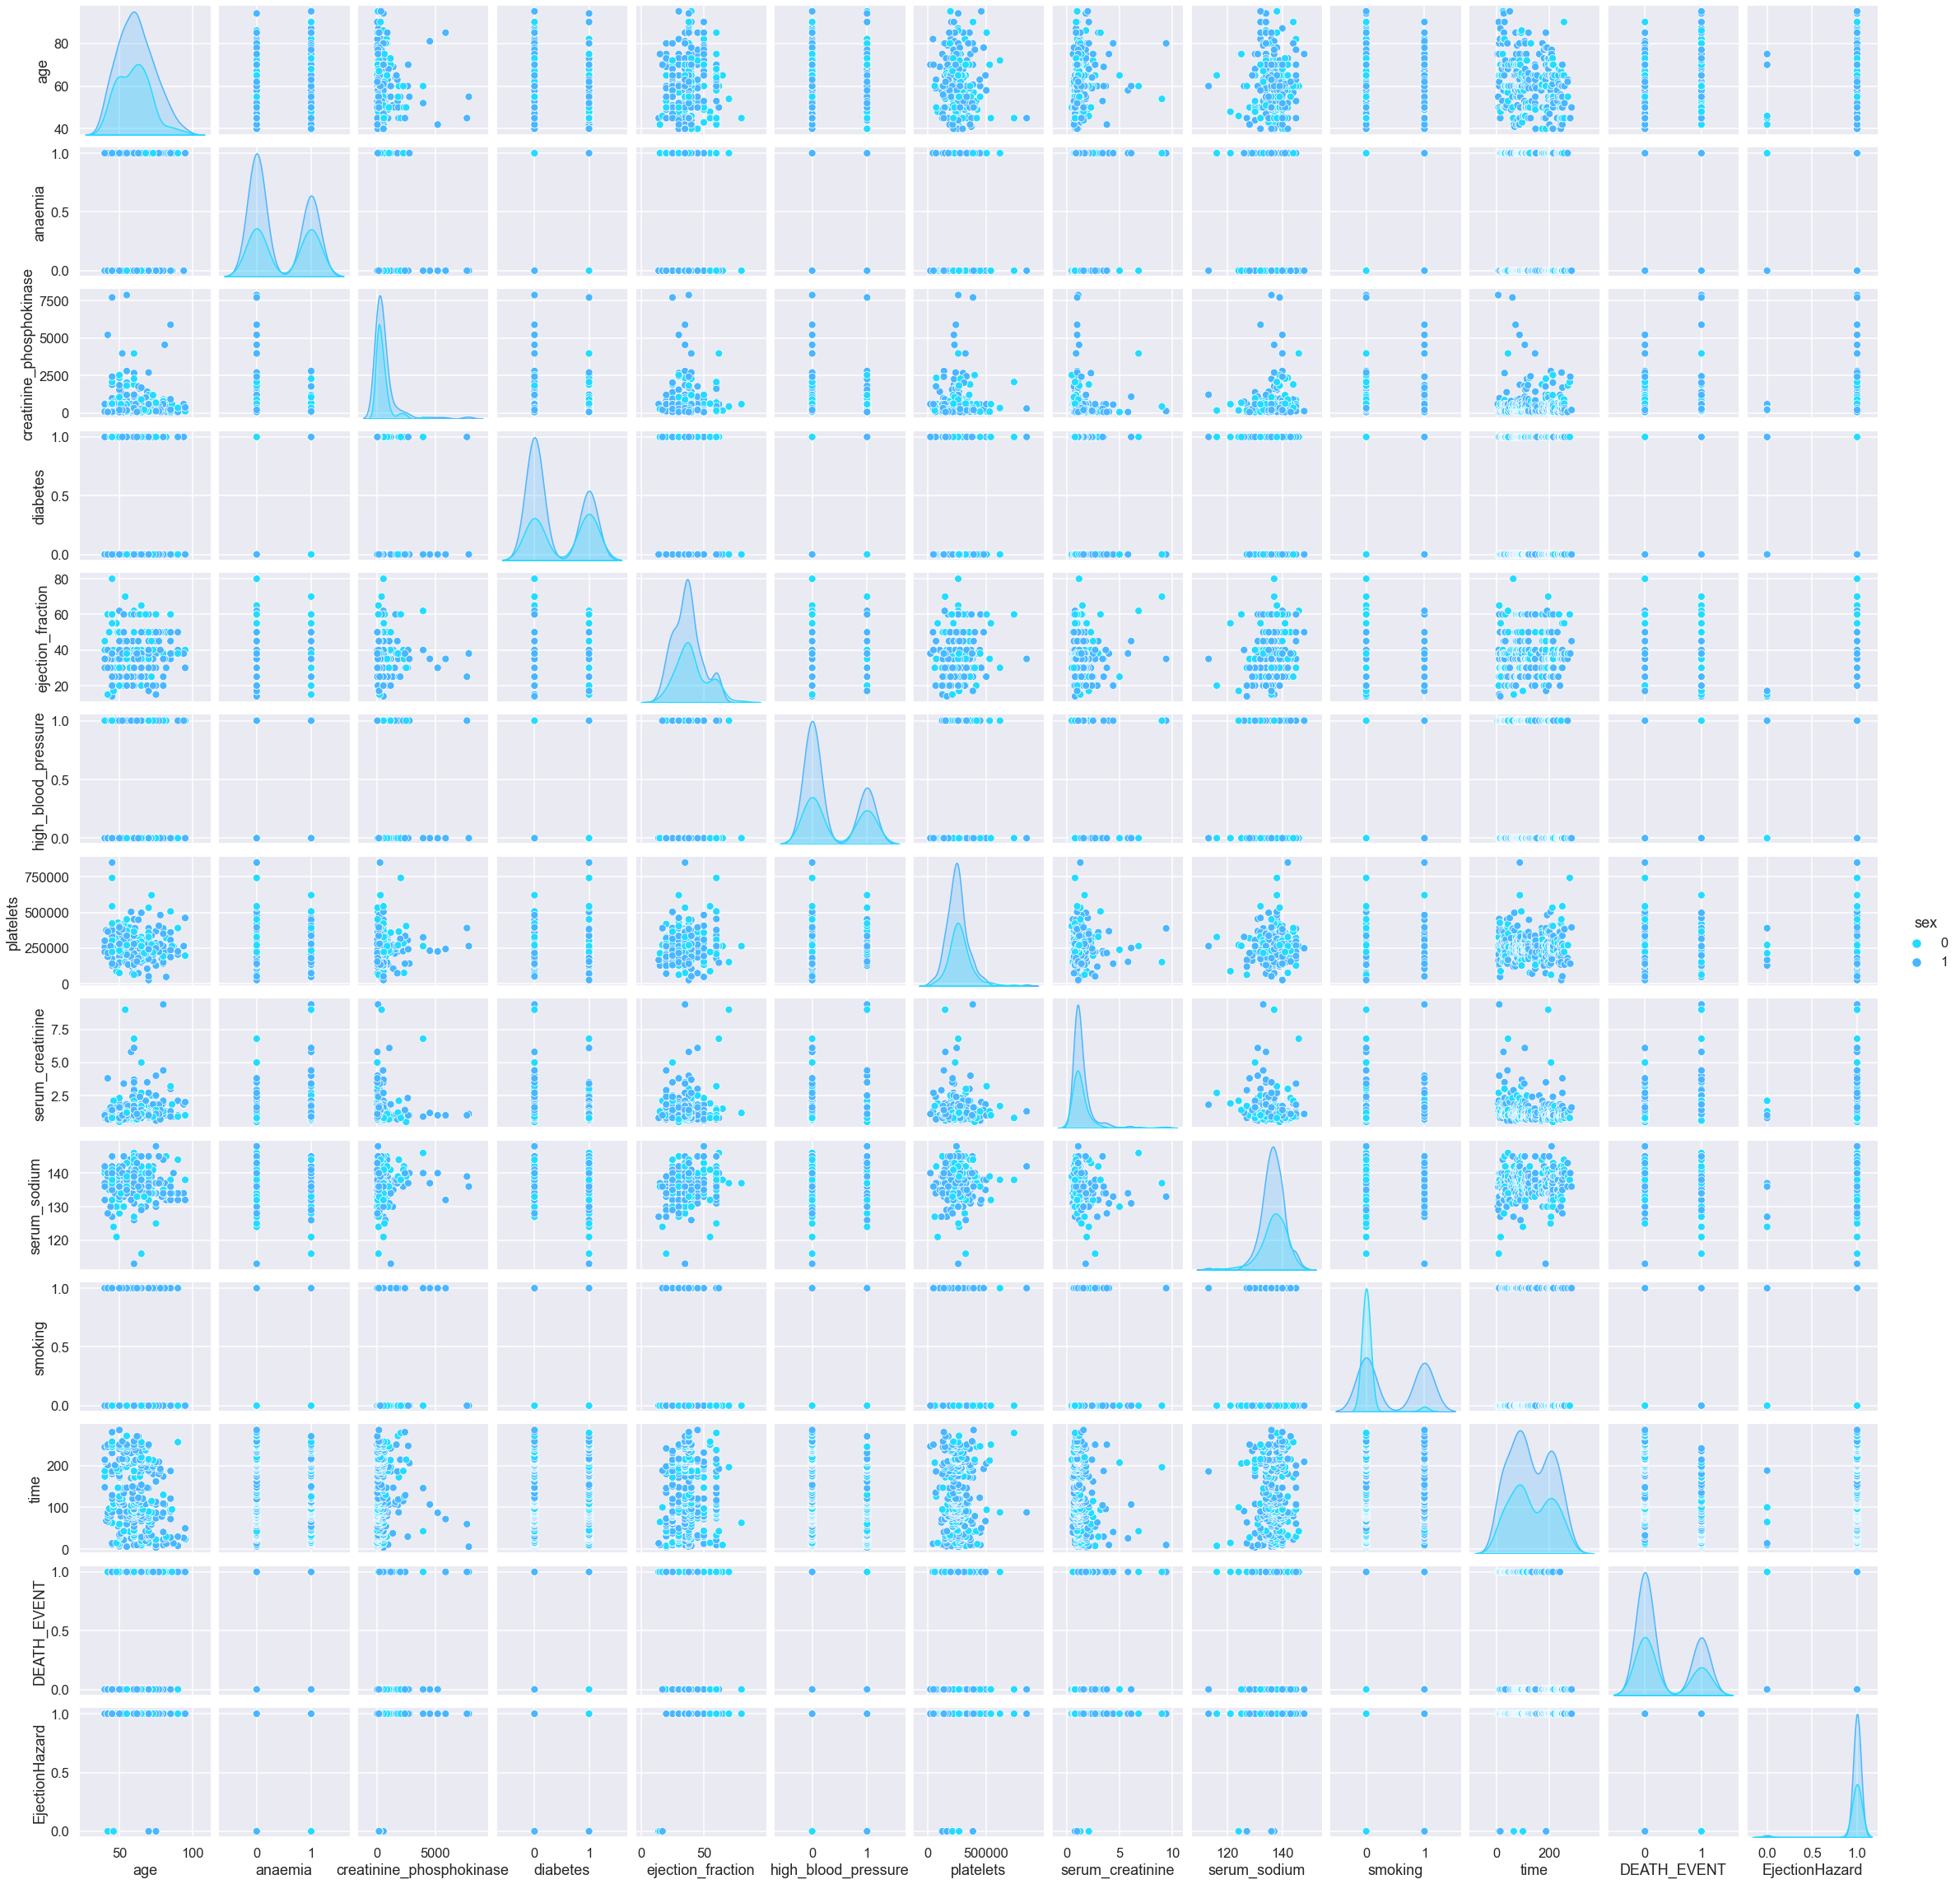

In [224]:
sns.pairplot(df, hue="sex");

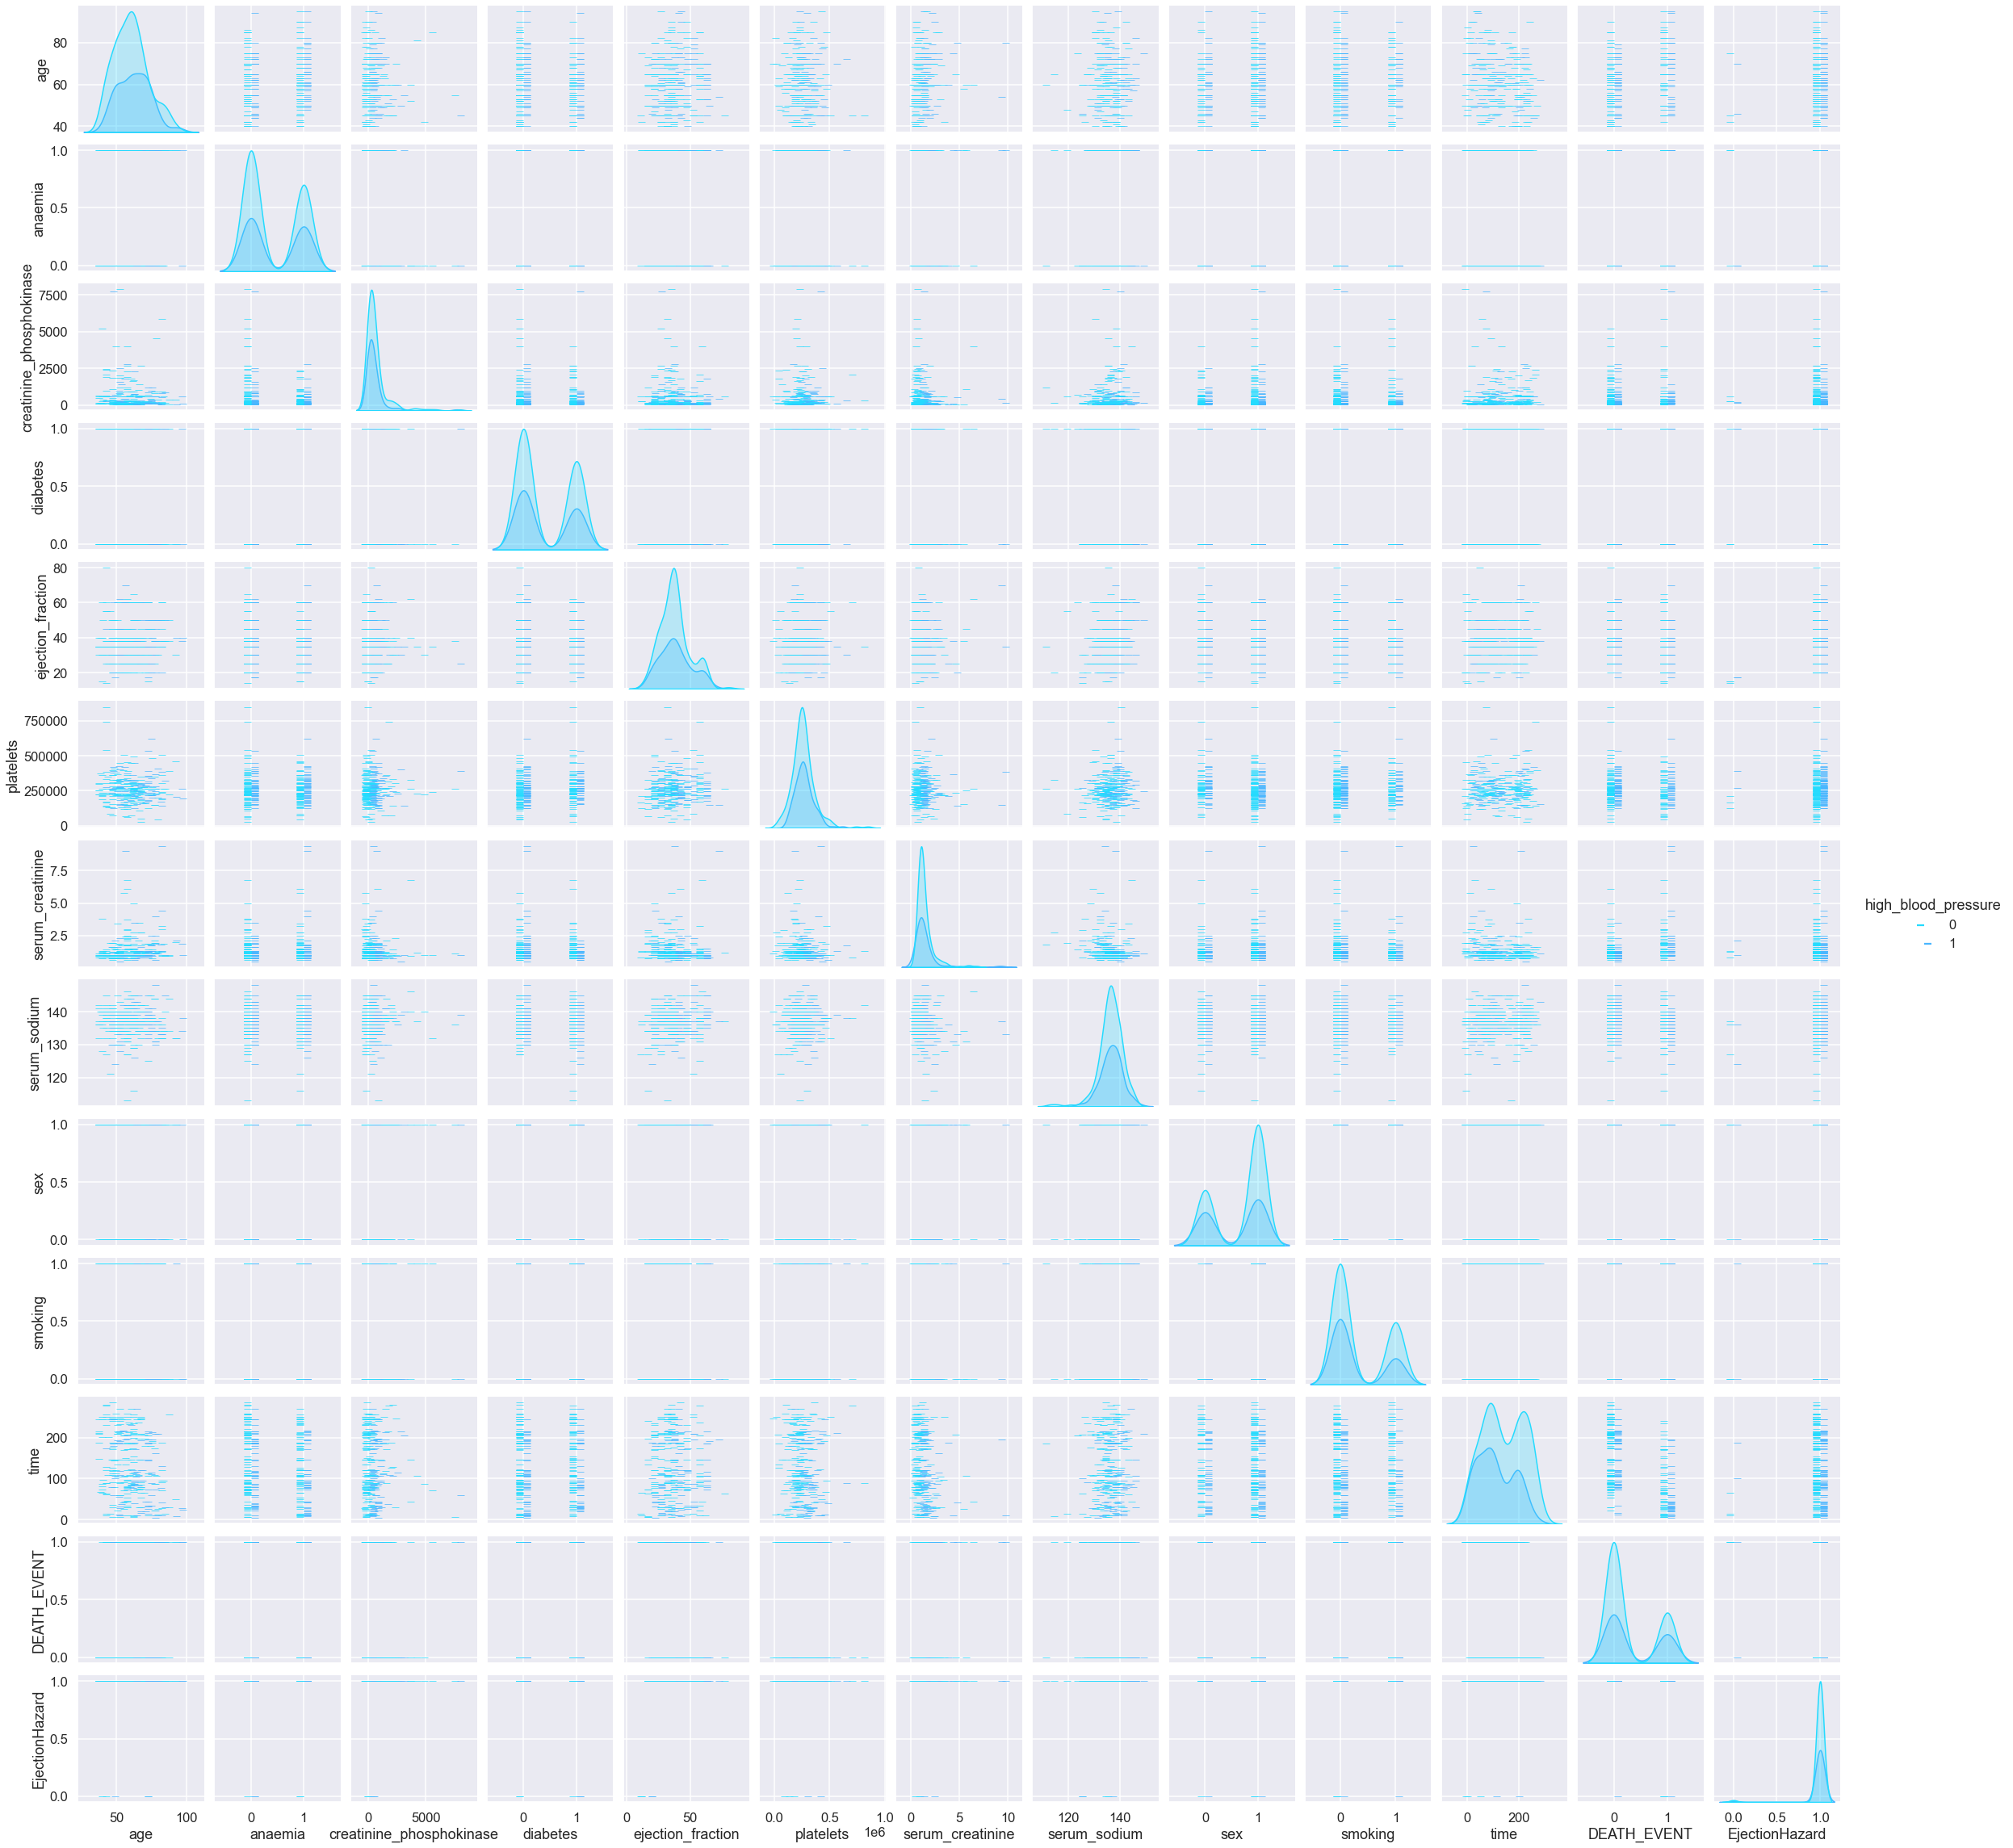

In [225]:
sns.pairplot(df, hue="high_blood_pressure", markers = [0,1]);

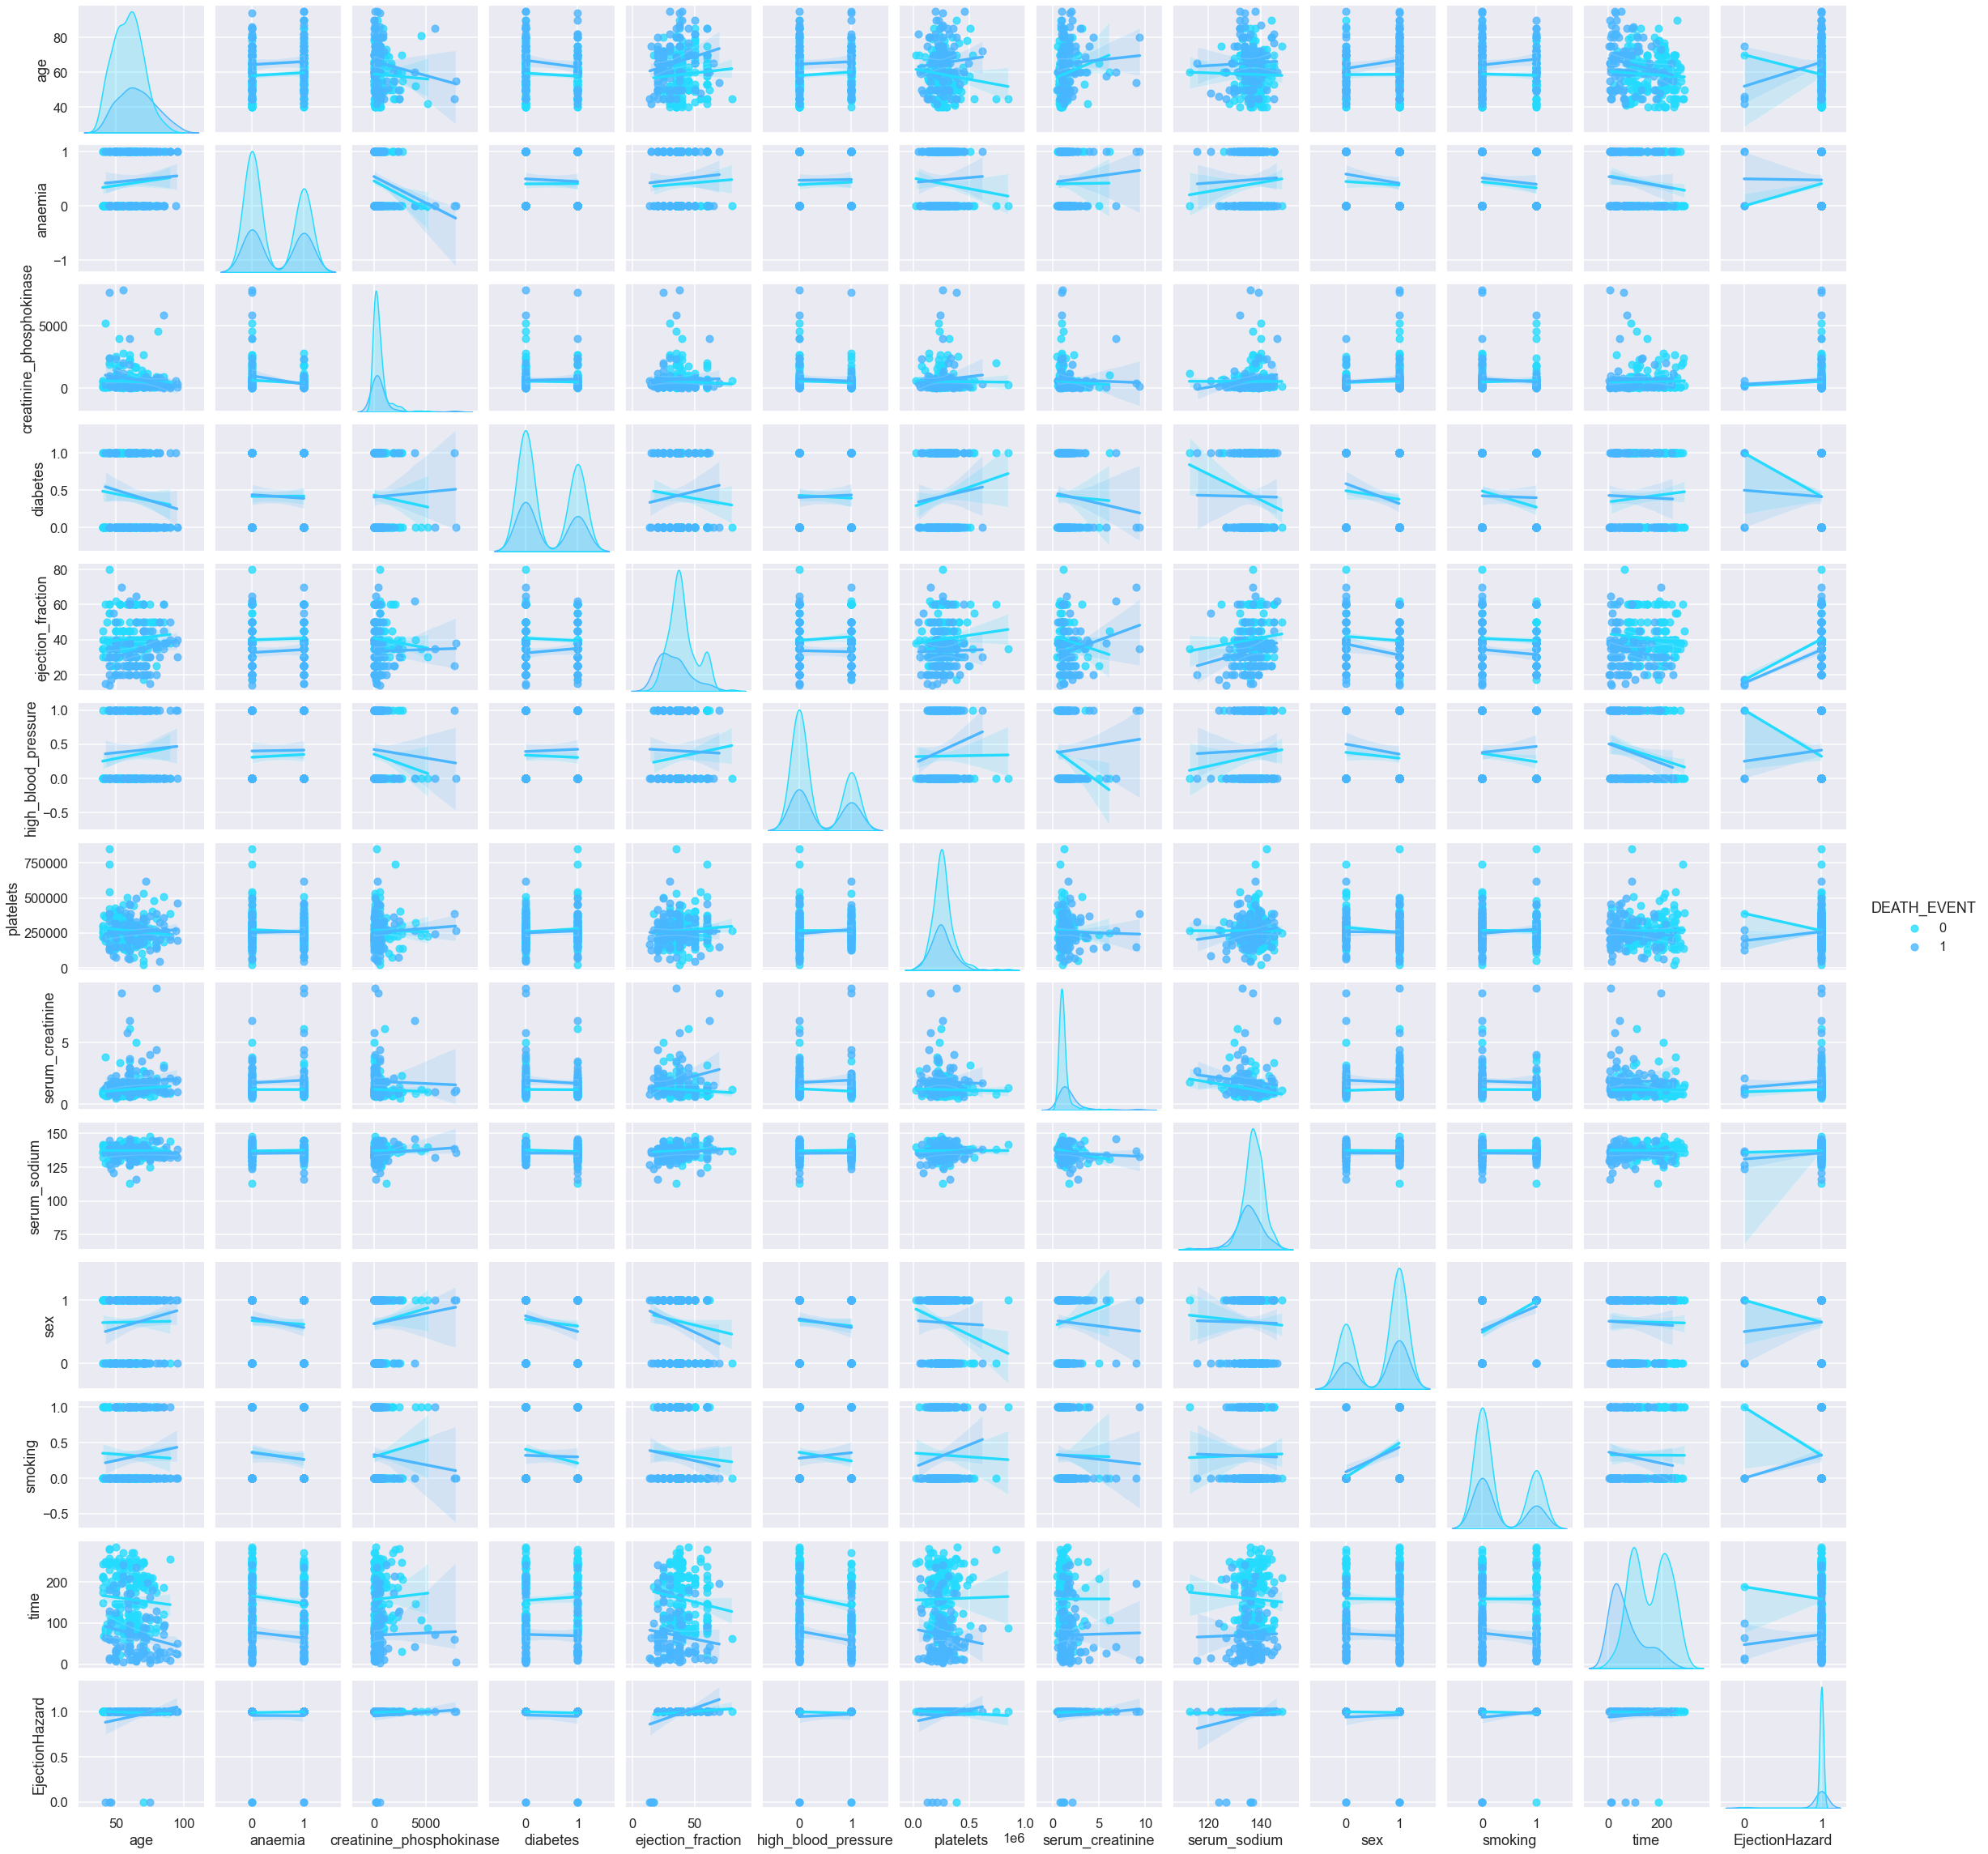

In [226]:
sns.pairplot(df, kind="reg",hue="DEATH_EVENT");

#### SONUÇ: Veri setinde bulunan, önceliği belirlenmiş nitelikli özelliklere göre Numpy, Pandas, Matplotlib, Seaborn kütüphaneleri kullanılarak SubPlot görselleştirme tekniği ile ikiden fazla olan anlamlı özellikler karşılaştırılıp Scatter Plot, Count Plot, Box Plot, Violin, lmplot, Scatterplot Matrisi (PairPlot) veri görselleştirme teknikleri uygulanmıştır.